<a href="https://colab.research.google.com/github/tpluym/EDI/blob/main/empathfullscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring a dictionary-based approach with Empath

**COLAB NOTEBOOK VERSION:** To run this notebook in CoLab, please [click here](https://colab.research.google.com/github/senthilchandrasegaran/IDEM105-EDI/blob/main/empath.ipynb).

Empath (see [Fast et al., 2016](https://dl.acm.org/doi/10.1145/2858036.2858535)) is a tool for analysing a given corpus of text to identify the occurrence of certain pre-defined linguistic categories (similar to what is provided by LIWC), but also provides us with a way to create our own linguistic categories based on the behaviour we might want to examine.

In [4]:
!pip install empath
import pandas as pd
from empath import Empath
lexicon = Empath()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57798 sha256=9851ca95a57cc0bbd87f840a4722ee5ef8f0cc87e30f0b8be384f0fc7a9c2a81
  Stored in directory: /root/.cache/pip/wheels/b5/93/85/f4e8694df404eb214060dd0e0f3fda14398638f5835b3dde23
Successfully built empath


In [5]:
transcript_df = pd.read_excel('/content/Transcript bewerkt-final.xlsx')
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance
944,944,01:26:47,Sarah Duister,Oh.
263,263,00:17:58,Sarah Duister,Yeah.
714,714,01:02:59,Tessel Pluym,Just different problems also for different peo...


In [6]:
from datetime import time
def convert_to_seconds(t_str):
    t = time.fromisoformat(t_str)
    sec = t.hour * 3600 + t.minute * 60 + t.second
    return sec

transcript_df['timestamp_sec'] = transcript_df['timestamp'].apply(convert_to_seconds)
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance,timestamp_sec
628,628,00:54:17,Tessel Pluym,"Oh yeah, it could be a tension as well.",3257
836,836,01:12:49,Tessel Pluym,"Oh, so we can sort of. It doesn't really have ...",4369
738,738,01:05:07,Sarah Duister,But also influence how they are.,3907


In [7]:
utterances = transcript_df['utterance'].to_list()

## Get the list of categories from Empath
Empath has a set of predefined categories. To create a new category of your own, use the following command. The command takes two inputs: a category name, and a short list of 3 to 5 sample or "seed" words to help Empath populate the category.

In [8]:
category_name = "thinking"
category_seed_words = ["think", "make", "inspiration"]
lexicon.create_category(category_name, category_seed_words)

["Because", "actually", "If", "write", "though", "guess", "cause", "Maybe", "maybe", "mean", "honestly", "like", "anyway", "inspiration", "hope", "understand", "might", "help", "cause", "try", "Now", "story", "Plus", "should", "work", "hopefully", "Or", "Also", "probably", "forget", "anyways", "Well", "motivation", "find", "whatever", "best", "wish", "so", "thought", "Honestly", "suppose", "means", "things", "anything", "add", "reason", "always", "believe", "Sometimes", "Actually", "wanted", "ideas", "So", "seriously", "remind", "cause", "anyway", "trust", "Hopefully", "figured", "part", "need", "Anyway"]


To analyze a piece of text using this category, use the following function.

In [9]:
lexicon.analyze("Let's maybe try this new approach.", categories=["thinking"], normalize=True)

{'thinking': 0.3333333333333333}

## Analysing a piece of text using Empath
Let's say you want to see if a text uses a higher density of `thinking` words (i.e, the number of 'positive emotion' words divided by the total words in the review) than another text. For that matter, we just want to see what the `thinking` scores are across all the reviews. We can use the following approach.

Some categories: prototyping, fixation, agreement, disagreement, insight

We can create a function for this approach so that we can pass this function to the dataframe.

In [10]:
def calc_thinking(text):
    category = 'thinking'
    score = lexicon.analyze(text, categories=[category], normalize=True)
    return score[category]

transcript_df['thinking'] = transcript_df['utterance'].apply(calc_thinking)

transcript_df.sample(5)

,Unnamed: 0,timestamp,speaker,utterance,timestamp_sec,thinking
374,374,00:27:25,Jasmijn Miog,"Oh yeah, and they also established partnership...",1645,0.00
1044,1044,01:35:26,Sarah Duister,Yeah. So normally maybe it's paid but maybe wh...,5726,0.20
951,951,01:27:20,Jasmijn Miog,"Yeah, always the answer.",5240,0.25
448,448,00:32:03,Jasmijn Miog,And.,1923,0.00
762,762,01:06:28,Sarah Duister,How should we define it?,3988,0.20


We can then plot a histogram of the scores to see their distribution.

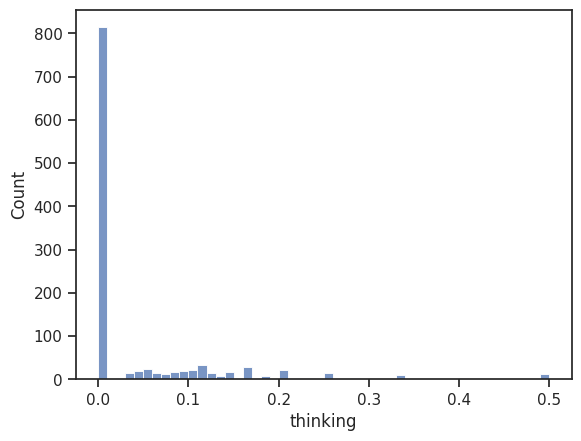

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')
sns.set_style('ticks')
plt.figure(dpi=100)

g = sns.histplot(x='thinking', data=transcript_df)

<Figure size 640x480 with 0 Axes>

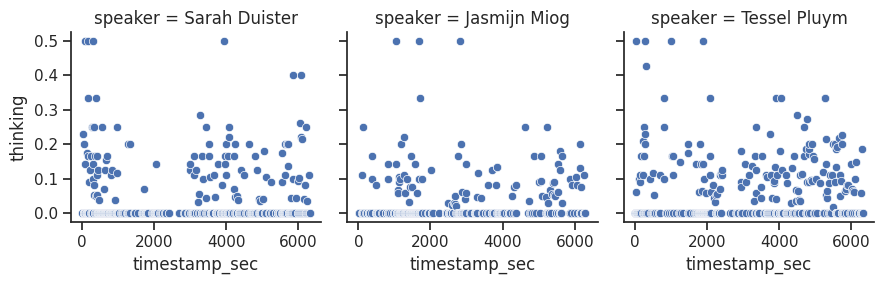

In [12]:
plt.figure(dpi=100)
g = sns.FacetGrid(transcript_df, col="speaker")
g.map(sns.scatterplot, "timestamp_sec", "thinking")


## A similar approach for sentiment analysis

In [13]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [14]:
def sentiment(text) :
    vs = analyzer.polarity_scores(text)['compound']
    return vs

In [15]:
transcript_df['sentiment'] = transcript_df['utterance'].apply(sentiment)
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance,timestamp_sec,thinking,sentiment
864,864,01:16:35,Tessel Pluym,Yeah. And then as like an addition we can do l...,4595,0.036585,0.9450
968,968,01:28:52,Tessel Pluym,"So now I think this one. Yeah, this is quite a...",5332,0.063830,0.8933
675,675,00:59:35,Sarah Duister,"Fair use of the park, yeah.",3575,0.000000,0.5423


<Figure size 640x480 with 0 Axes>

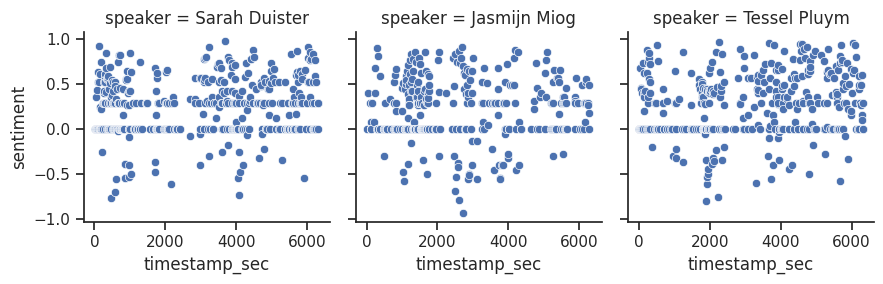

In [16]:
plt.figure(dpi=100)
g = sns.FacetGrid(transcript_df, col="speaker")
g.map(sns.scatterplot, "timestamp_sec", "sentiment")

<Axes: xlabel='thinking', ylabel='sentiment'>

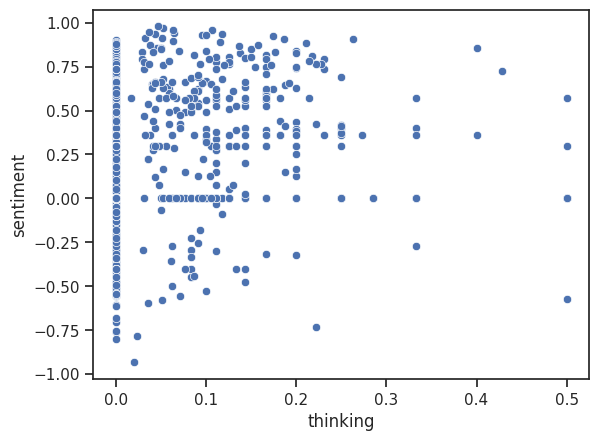

In [17]:
sns.scatterplot(data=transcript_df, x = "thinking", y="sentiment")

## Exercise

Identify a particular behaviour you notice in your session's transcript.


**Specify:** think of words related to "convergence"

Can you create an Empath category for this behaviour?
Analyze the transcript with your new category.
Compare your transcript with someone else's?



A. Turn-Taking Dynamics

In [58]:
import pandas as pd

# Assuming you have a DataFrame called 'transcript_df' with 'timestamp_sec', 'speaker', 'utterance' columns

# 1. Turn Frequency and Duration

# Calculate turn durations
transcript_df['turn_duration'] = transcript_df['timestamp_sec'].diff()  # Calculate time difference between consecutive utterances
transcript_df.loc[0, 'turn_duration'] = 0  # Set duration for the first utterance to 0

# Assign turn durations to the speaker who started the turn
transcript_df['turn_starter'] = transcript_df['speaker'].shift(1)  # Shift speaker column to identify the previous speaker
transcript_df.loc[0, 'turn_starter'] = transcript_df.loc[0, 'speaker']  # Set starter for the first utterance to the current speaker

# Calculate turn frequency per speaker
turn_frequency = transcript_df.groupby('speaker')['turn_starter'].count()
print("Turn Frequency per Speaker:\n", turn_frequency)

# Calculate average turn duration per speaker
average_turn_duration = transcript_df.groupby('speaker')['turn_duration'].mean()
print("\nAverage Turn Duration per Speaker:\n", average_turn_duration)


# 2. Interruptions and Overlaps

# Define a threshold for interruption (in seconds)
interruption_threshold = 2  # Adjust this value as needed

# Identify interruptions using a boolean mask
transcript_df['interruption'] = (transcript_df['turn_duration'] < interruption_threshold) & (transcript_df['speaker'] != transcript_df['turn_starter'])

# Calculate interruption frequency per speaker
interruption_frequency = transcript_df.groupby('speaker')['interruption'].sum()
print("\nInterruption Frequency per Speaker:\n", interruption_frequency)

# Identify overlapping turns (adjust threshold as needed)
overlapping_turns = transcript_df[(transcript_df['turn_duration'] < 1) & (transcript_df['speaker'] != transcript_df['turn_starter'])]

# Analyze the frequency of overlapping turns
print("\nNumber of Overlapping Turns:", len(overlapping_turns))


# 3. Back-channeling

# Define back-channeling cues
back_channeling_cues = ["uh-huh", "yeah", "okay", "right", "mhm", "hmm"]  # Add more cues as needed

# Create a back-channeling column
transcript_df['back_channeling'] = transcript_df['utterance'].str.contains('|'.join(back_channeling_cues), case=False)

# Analyze the distribution of back-channeling
back_channeling_by_speaker = transcript_df.groupby('speaker')['back_channeling'].sum()
print("\nBack-channeling Frequency per Speaker:\n", back_channeling_by_speaker)

Turn Frequency per Speaker:
 speaker
Jasmijn Miog     337
Sarah Duister    442
Tessel Pluym     372
Name: turn_starter, dtype: int64

Average Turn Duration per Speaker:
 speaker
Jasmijn Miog     5.810089
Sarah Duister    5.635747
Tessel Pluym     4.989247
Name: turn_duration, dtype: float64

Interruption Frequency per Speaker:
 speaker
Jasmijn Miog     34
Sarah Duister    49
Tessel Pluym     51
Name: interruption, dtype: int64

Number of Overlapping Turns: 45

Back-channeling Frequency per Speaker:
 speaker
Jasmijn Miog      93
Sarah Duister    168
Tessel Pluym     106
Name: back_channeling, dtype: int64


In [60]:
import pandas as pd

# Create a dictionary to store the data
data = {
    "Turn Frequency per Speaker": {'Jasmijn Miog': 337, 'Sarah Duister': 442, 'Tessel Pluym': 372},
    "Average Turn Duration per Speaker": {'Jasmijn Miog': 5.810089, 'Sarah Duister': 5.635747, 'Tessel Pluym': 4.989247},
    "Interruption Frequency per Speaker": {'Jasmijn Miog': 34, 'Sarah Duister': 49, 'Tessel Pluym': 51},
    "Back-channeling Frequency per Speaker": {'Jasmijn Miog': 93, 'Sarah Duister': 168, 'Tessel Pluym': 106}
}

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Transpose the DataFrame to have speakers as columns and headings as rows
table_chart = df.T

# Display the table chart
print(table_chart)

                                       Jasmijn Miog  Sarah Duister  \
Turn Frequency per Speaker               337.000000     442.000000   
Average Turn Duration per Speaker          5.810089       5.635747   
Interruption Frequency per Speaker        34.000000      49.000000   
Back-channeling Frequency per Speaker     93.000000     168.000000   

                                       Tessel Pluym  
Turn Frequency per Speaker               372.000000  
Average Turn Duration per Speaker          4.989247  
Interruption Frequency per Speaker        51.000000  
Back-channeling Frequency per Speaker    106.000000  


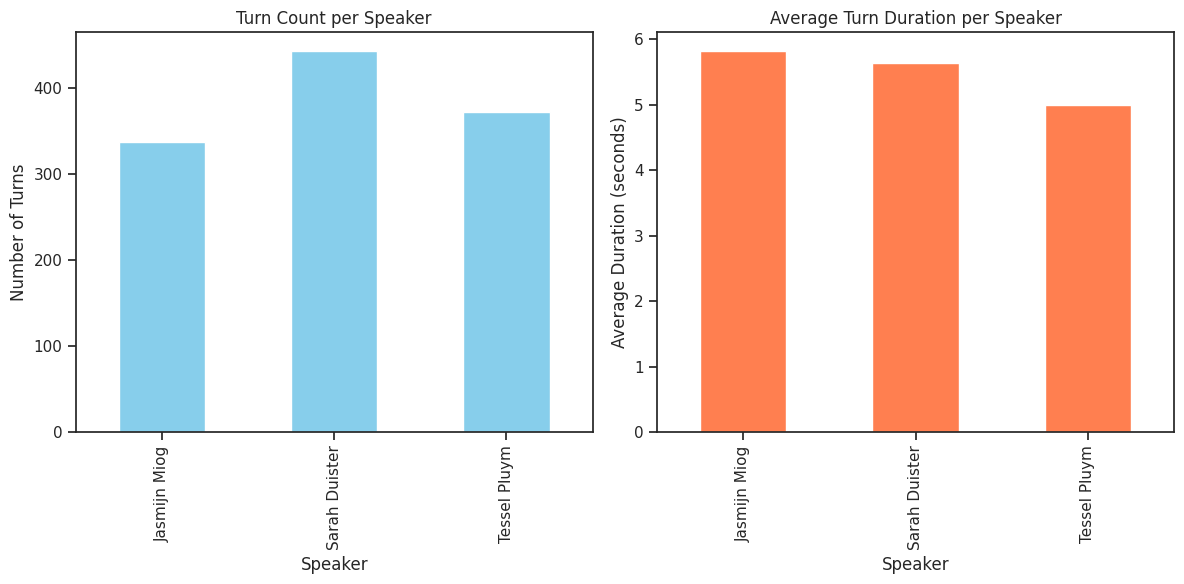

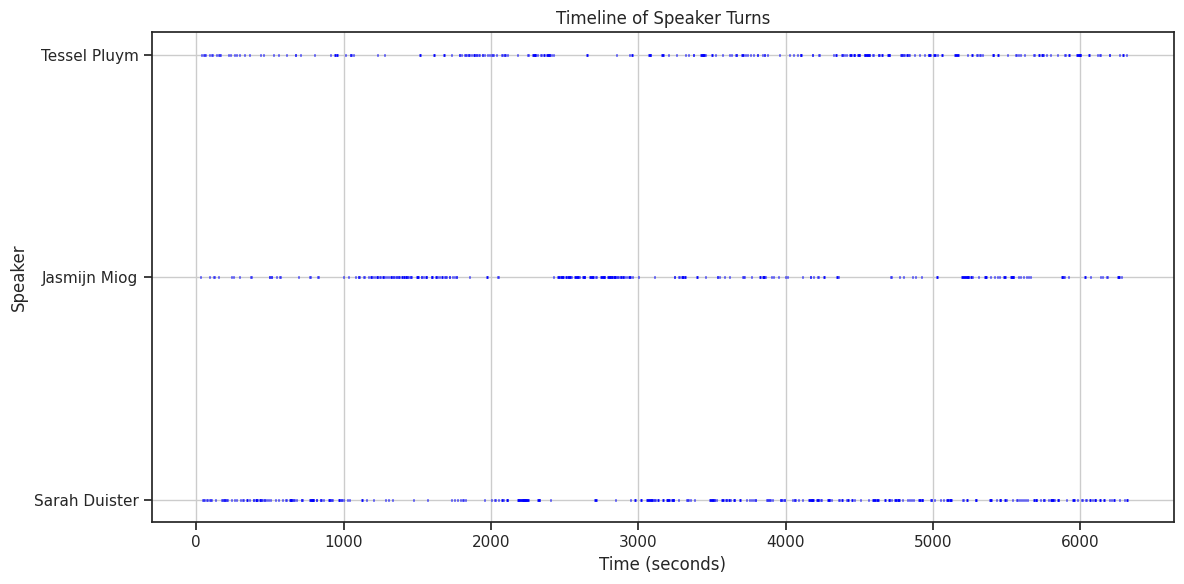

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'transcript_df' with 'timestamp_sec', 'speaker', 'utterance', 'turn_duration' columns
# and have already calculated turn frequency and average turn duration as shown in the previous response

# 1. Bar Chart: Speaker Contribution

# Create subplots for turn count and average turn duration
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for turn count
turn_frequency.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Turn Count per Speaker")
axes[0].set_xlabel("Speaker")
axes[0].set_ylabel("Number of Turns")

# Bar chart for average turn duration
average_turn_duration.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title("Average Turn Duration per Speaker")
axes[1].set_xlabel("Speaker")
axes[1].set_ylabel("Average Duration (seconds)")

plt.tight_layout()
plt.show()


# 2. Timeline Plot: Sequence of Turns

# Create a figure and axes for the timeline plot
plt.figure(figsize=(12, 6))

# Plot each turn as a horizontal line segment
for i, row in transcript_df.iterrows():
    plt.hlines(y=row['speaker'], xmin=row['timestamp_sec'], xmax=row['timestamp_sec'] + row['turn_duration'],
               colors='blue', linewidth=2)  # Customize colors and linewidth as needed

# Customize plot
plt.title("Timeline of Speaker Turns")
plt.xlabel("Time (seconds)")
plt.ylabel("Speaker")
plt.grid(True)
plt.tight_layout()
plt.show()

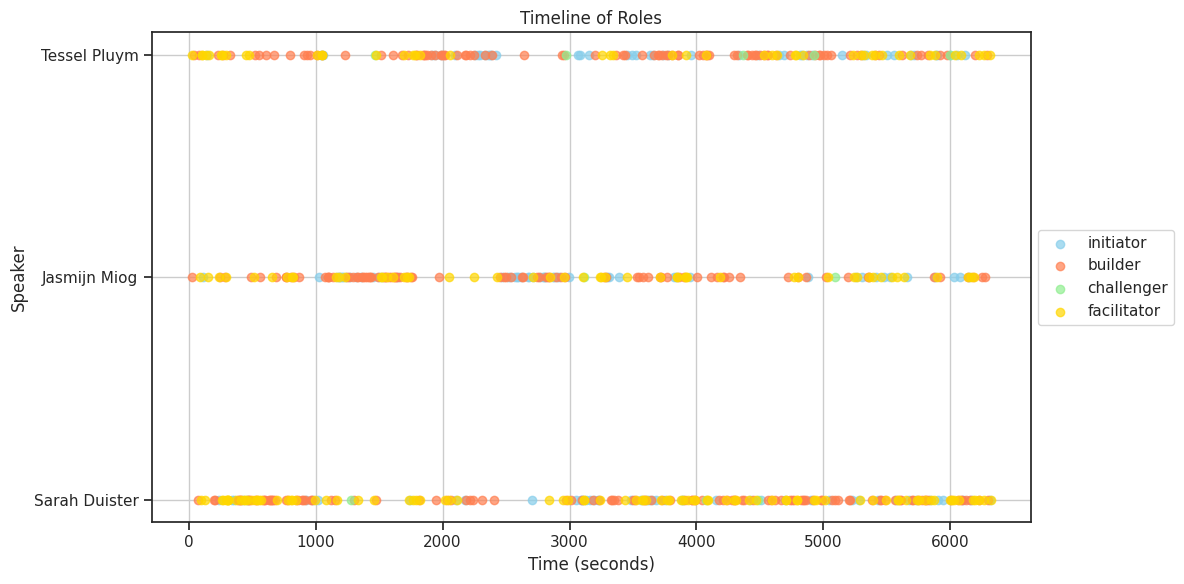

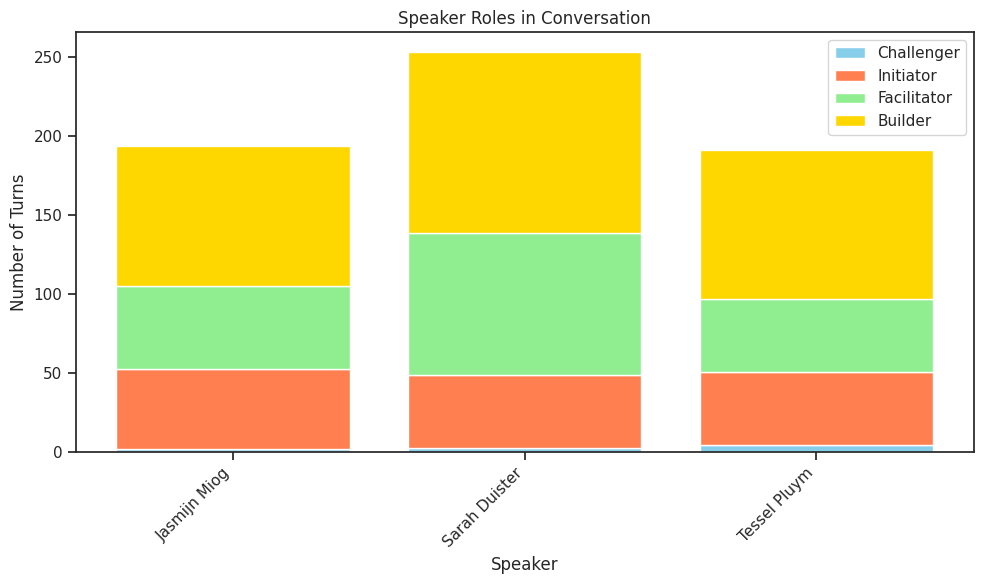


Role Distribution Table:
role           builder  challenger  facilitator  initiator
speaker                                                   
Jasmijn Miog        89           2           52         51
Sarah Duister      114           3           90         46
Tessel Pluym        94           5           46         46


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'transcript_df' with 'timestamp_sec', 'speaker', 'utterance', 'turn_duration', 'interruption', 'back_channeling' columns

# 1. Define Linguistic Markers and Turn-Taking Features for Roles
role_features = {
    "initiator": {
        "markers": ["what if", "how about", "let's try", "so", "okay", "well", "now", "then", "alright", "so then"],
        "turn_duration": "above_average",
        "interruptions": "low",
        "back_channeling_received": "average"
    },
    "builder": {
        "markers": ["yes, and", "also", "in addition", "furthermore", "moreover"],
        "turn_duration": "average",
        "interruptions": "average",
        "back_channeling_received": "average"
    },
    "challenger": {
        "markers": ["but", "however", "actually", "really", "i disagree", "i'm not sure"],
        "turn_duration": "below_average",
        "interruptions": "high",
        "back_channeling_received": "low"
    },
    "facilitator": {
        "markers": ["does anyone", "what do you think", "let's hear from", "any thoughts", "can you elaborate"],
        "turn_duration": "average",
        "interruptions": "low",
        "back_channeling_received": "high"
    }
}

# 2. Assign Roles to Speaker Turns
def assign_role(row):
    for role, features in role_features.items():
        marker_match = any(marker in row['utterance'].lower() for marker in features['markers'])

        turn_duration_match = (
            (features["turn_duration"] == "above_average" and row['turn_duration'] > transcript_df['turn_duration'].mean()) or
            (features["turn_duration"] == "below_average" and row['turn_duration'] < transcript_df['turn_duration'].mean()) or
            (features["turn_duration"] == "average")
        )

        interruption_match = (
            (features["interruptions"] == "high" and row['interruption']) or
            (features["interruptions"] == "low" and not row['interruption']) or
            (features["interruptions"] == "average")
        )

        # Facilitator Logic: High back-channeling frequency
        facilitator_match = (role == "facilitator" and row['back_channeling'])

        # Builder Logic: Expands on ideas (markers) or provides context/information
        builder_match = (role == "builder" and (marker_match or (row['turn_duration'] > transcript_df['turn_duration'].mean() and not row['interruption'])))

        if marker_match or facilitator_match or builder_match:
           if turn_duration_match and interruption_match :
              return role

    return "other"  # Assign "other" if no specific role is identified


transcript_df['role'] = transcript_df.apply(assign_role, axis=1)


# 3. Calculate Role Distribution per Speaker
role_distribution = transcript_df.groupby(['speaker', 'role'])['utterance'].count().reset_index()

# 4. Visualizations

# 4.1. Timeline of Roles
plt.figure(figsize=(12, 6))

for speaker in transcript_df['speaker'].unique():
    speaker_data = transcript_df[transcript_df['speaker'] == speaker]
    for role, color in zip(['initiator', 'builder', 'challenger', 'facilitator'], ['skyblue', 'coral', 'lightgreen', 'gold']):
        role_data = speaker_data[speaker_data['role'] == role]
        plt.scatter(role_data['timestamp_sec'], [speaker] * len(role_data), marker='o', color=color, label=role if speaker == transcript_df['speaker'].unique()[0] else "", alpha=0.7)

plt.xlabel("Time (seconds)")
plt.ylabel("Speaker")
plt.title("Timeline of Roles")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.2. Stacked Bar Chart of Roles per Speaker
fig, ax = plt.subplots(figsize=(10, 6))

speakers = role_distribution['speaker'].unique()
roles = ['challenger', 'initiator', 'facilitator', 'builder']

filtered_role_distribution = role_distribution[role_distribution['role'].isin(roles)]

bottom = [0] * len(speakers)
for role, color in zip(roles, ['skyblue', 'coral', 'lightgreen', 'gold']):
    role_counts = filtered_role_distribution[filtered_role_distribution['role'] == role].set_index('speaker')['utterance']
    role_counts = role_counts.reindex(speakers, fill_value=0)
    ax.bar(speakers, role_counts, bottom=bottom, label=role.capitalize(), color=color)
    bottom = [b + role_counts.get(speaker, 0) for b, speaker in zip(bottom, speakers)]

ax.set_xlabel("Speaker")
ax.set_ylabel("Number of Turns")
ax.set_title("Speaker Roles in Conversation")
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4.3. Display Numerical Values in a Table
print("\nRole Distribution Table:")
print(filtered_role_distribution.pivot(index='speaker', columns='role', values='utterance').fillna(0).astype(int))

In [70]:
!pip install networkx

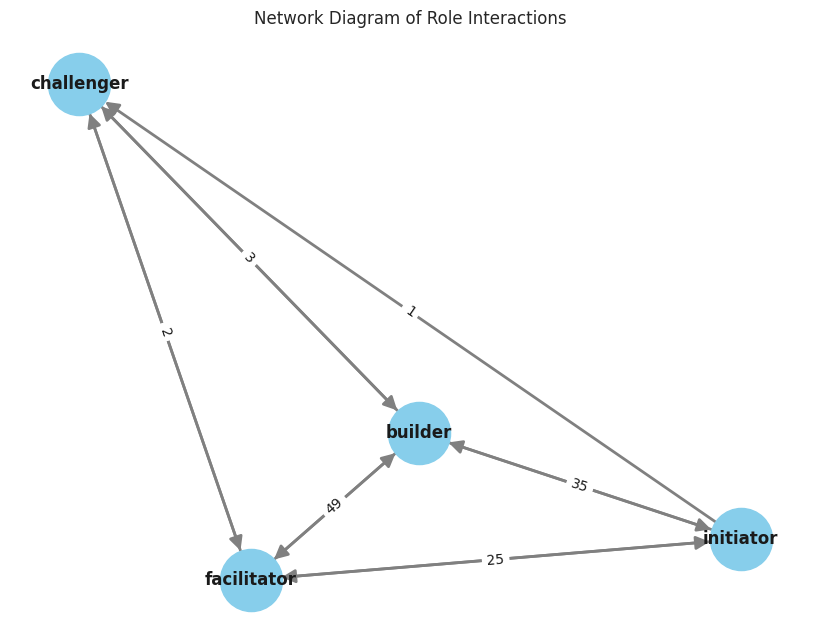

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# ... (Previous code for role identification, role_features, assign_role, role_distribution) ...

# 5. Network Diagram: Map Interactions between Roles

# Create a directed graph
G = nx.DiGraph()

# Add nodes (roles)
roles = ['challenger', 'initiator', 'facilitator', 'builder']
G.add_nodes_from(roles)

# Add edges (interactions) based on transitions between roles
for i in range(len(transcript_df) - 1):
    current_role = transcript_df.loc[i, 'role']
    next_role = transcript_df.loc[i + 1, 'role']
    if current_role in roles and next_role in roles and current_role != next_role:
        # Add edge if transition occurs between different specified roles
        if G.has_edge(current_role, next_role):
            G[current_role][next_role]['weight'] += 1  # Increase weight if edge exists
        else:
            G.add_edge(current_role, next_role, weight=1)

# Draw the network diagram
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, k=0.5)  # Adjust k for node spacing
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12,
        font_weight='bold', arrowsize=20, width=2, edge_color="gray")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Network Diagram of Role Interactions")
plt.show()